<a href="https://colab.research.google.com/github/SamilG2/challenge-alurastore-datascience/blob/main/Solution_AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Sumar los precios de las ventas para cada tienda
fact_tienda1 = tienda['Precio'].astype(float).sum()
fact_tienda2 = tienda2['Precio'].astype(float).sum()
fact_tienda3 = tienda3['Precio'].astype(float).sum()
fact_tienda4 = tienda4['Precio'].astype(float).sum()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturas = [fact_tienda1, fact_tienda2, fact_tienda3, fact_tienda4]

# Resultados
print(f"Facturación de la Tienda 1: ${fact_tienda1:,.2f}")
print(f"Facturación de la Tienda 2: ${fact_tienda2:,.2f}")
print(f"Facturación de la Tienda 3: ${fact_tienda3:,.2f}")
print(f"Facturación de la Tienda 4: ${fact_tienda4:,.2f}")

# Facturación total de todas las tiendas
fact_total = fact_tienda1 + fact_tienda2 + fact_tienda3 + fact_tienda4
print("\nFacturación total de todas las tiendas:", fact_total)

Facturación de la Tienda 1: $1,150,880,400.00
Facturación de la Tienda 2: $1,116,343,500.00
Facturación de la Tienda 3: $1,098,019,600.00
Facturación de la Tienda 4: $1,038,375,700.00

Facturación total de todas las tiendas: 4403619200.0


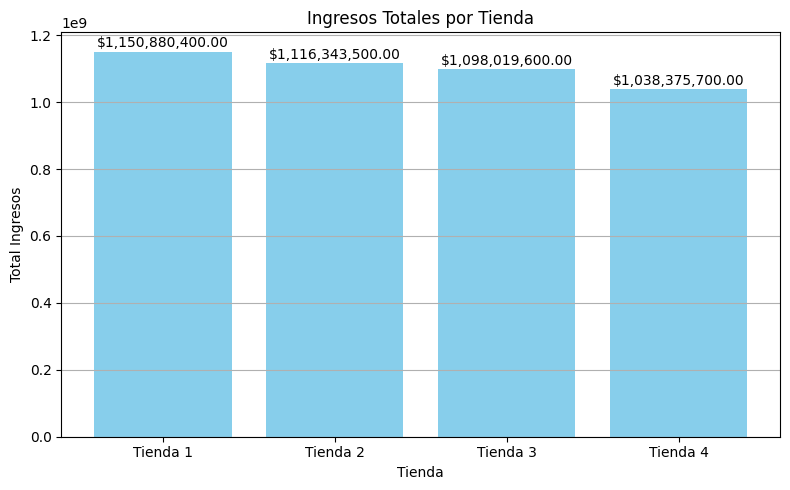

In [ ]:
import matplotlib.pyplot as plt
# Grafico de barras para Total de ingresos
plt.figure(figsize=(8,5))
barras = plt.bar(tiendas, facturas, color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.ylabel('Total Ingresos')
plt.xlabel('Tienda')
plt.grid(axis='y')
for barra, valor in zip(barras, facturas):
    plt.annotate(f'${valor:,.2f}',
                 xy=(barra.get_x() + barra.get_width() / 2, valor),
                 xytext=(0, 1),
                 textcoords='offset points',
                 ha='center', va='bottom')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
# Función para calcular/mostrar la cantidad de productos
# vendidos por categoría de una tienda
def productos_por_categoria(tienda, numero):
    cantidad = tienda.groupby('Categoría del Producto')['Precio'].count()
    print(f"\nCantidad de productos vendidos por categoría en la Tienda {numero}:")
    print(cantidad.sort_values(ascending=False))

# Resultados para cada tienda
productos_por_categoria(tienda, 1)
productos_por_categoria(tienda2, 2)
productos_por_categoria(tienda3, 3)
productos_por_categoria(tienda4, 4)


Cantidad de productos vendidos por categoría en la Tienda 1:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Precio, dtype: int64

Cantidad de productos vendidos por categoría en la Tienda 2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Precio, dtype: int64

Cantidad de productos vendidos por categoría en la Tienda 3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos

# 3. Calificación promedio de la tienda


In [ ]:
def clasificacion_promedio(tienda, numero):
    promedio = tienda['Calificación'].mean()
    print(f"Clasificación promedio en Tienda {numero}: {promedio:.2f}")

# Mostrar resultados para cada tienda
clasificacion_promedio(tienda, 1)
clasificacion_promedio(tienda2, 2)
clasificacion_promedio(tienda3, 3)
clasificacion_promedio(tienda4, 4)

Clasificación promedio en Tienda 1: 3.98
Clasificación promedio en Tienda 2: 4.04
Clasificación promedio en Tienda 3: 4.05
Clasificación promedio en Tienda 4: 4.00


# 4. Productos más y menos vendidos

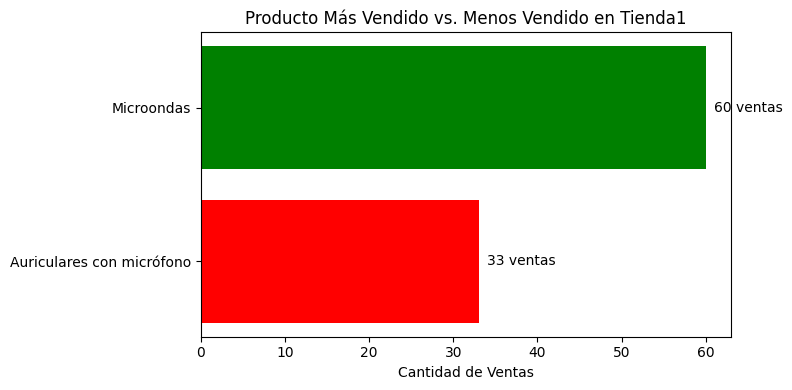

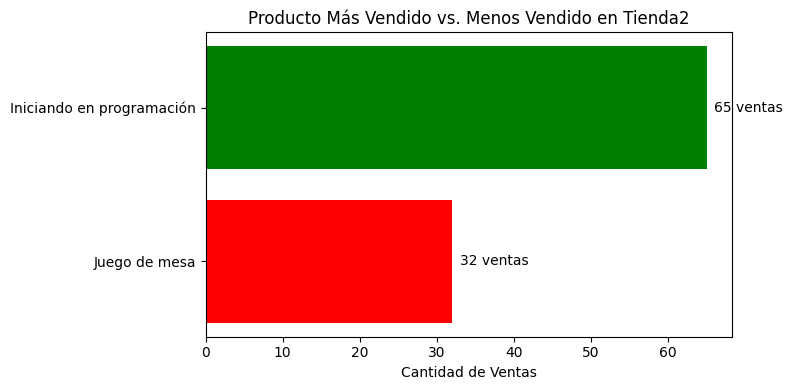

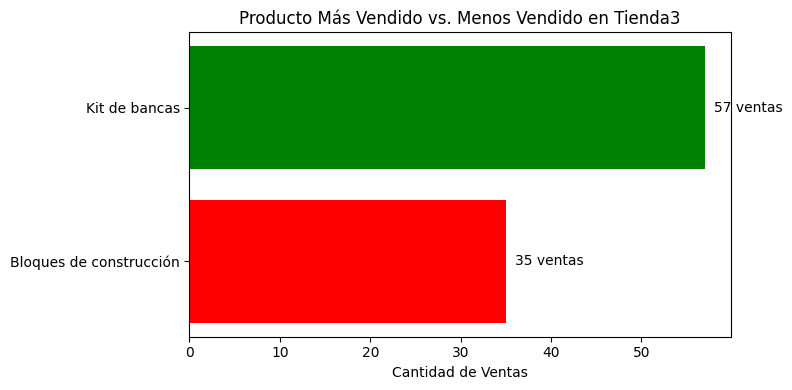

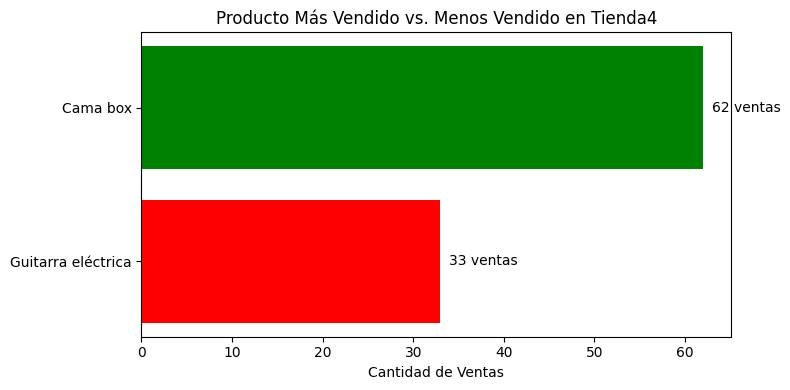

In [ ]:
import matplotlib.pyplot as plt

# Funciones para obtener producto más y menos vendido por tienda
def producto_masmenosvendido(tienda, numero):
    conteo_productos = tienda['Producto'].value_counts()

    # Verifica el producto más vendido
    producto_mas = conteo_productos.idxmax()
    ventas_mas = conteo_productos.max()

    # Verifica el producto menos vendido
    producto_menos = conteo_productos.idxmin()
    ventas_menos = conteo_productos.min()

    # Visualización
    productos = [producto_menos, producto_mas]
    ventas = [ventas_menos, ventas_mas]
    colores = ['red', 'green']

    plt.figure(figsize=(8, 4))
    barras = plt.barh(productos, ventas, color=colores)
    plt.title(f"Producto Más Vendido vs. Menos Vendido en Tienda{numero}")
    plt.xlabel("Cantidad de Ventas")

    for barra, venta in zip(barras, ventas):
        plt.text(venta + 1, barra.get_y() + barra.get_height()/2,
                 f"{venta} ventas", va='center')

    plt.tight_layout()
    plt.show()

# Resultados para cada tienda
producto_masmenosvendido(tienda, 1)
producto_masmenosvendido(tienda2, 2)
producto_masmenosvendido(tienda3, 3)
producto_masmenosvendido(tienda4, 4)

# 5. Envío promedio por tienda

In [ ]:
# Lista de DataFrames por tienda
tiendas_df = [tienda, tienda2, tienda3, tienda4]
nombres_tienda = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Lista para guardar los promedios
promedios_envio = []

# Calcular promedio de envío por tienda
for i, datos_tienda in enumerate(tiendas_df, start=1):
    promedio = datos_tienda['Costo de envío'].mean()
    print(f"{nombres_tienda[i-1]} - Envío promedio: ${promedio:.2f}")
    promedios_envio.append(promedio)

Tienda 1 - Envío promedio: $26018.61
Tienda 2 - Envío promedio: $25216.24
Tienda 3 - Envío promedio: $24805.68
Tienda 4 - Envío promedio: $23459.46


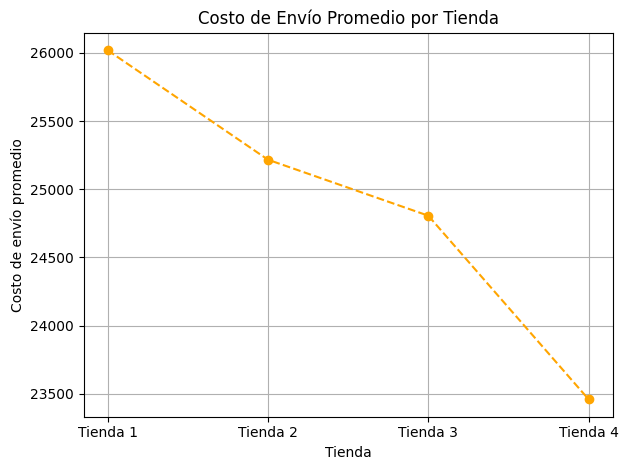

In [ ]:
import matplotlib.pyplot as plt

plt.plot(nombres_tienda, promedios_envio, marker='o', linestyle='--', color='orange')
plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.grid(True)
plt.tight_layout()
plt.show()

## **Informe Final: Recomendación de Venta de Tienda**

**Introducción:**

Este informe tiene como objetivo analizar el rendimiento de cuatro tiendas para asesorar al Sr. Juan sobre cuál de ellas debería vender, considerando factores clave como ingresos, ventas por categoría, calificaciones de clientes, productos más y menos vendidos, y costos de envío.

**Análisis:**

A continuación, se presentan los hallazgos clave de cada análisis realizado:

*   **Ingresos Totales por Tienda:**

    Según el análisis de facturación, los ingresos totales por tienda son los siguientes:

    1. Tienda 1: $1,150,880,400.00
    2. Tienda 2: $1,116,343,500.00
    3. Tienda 3: $1,098,019,600.00
    4. Tienda 4: $1,038,375,700.00

    La visualización de barras confirma que la Tienda 4 tiene los ingresos totales más bajos entre las cuatro tiendas.
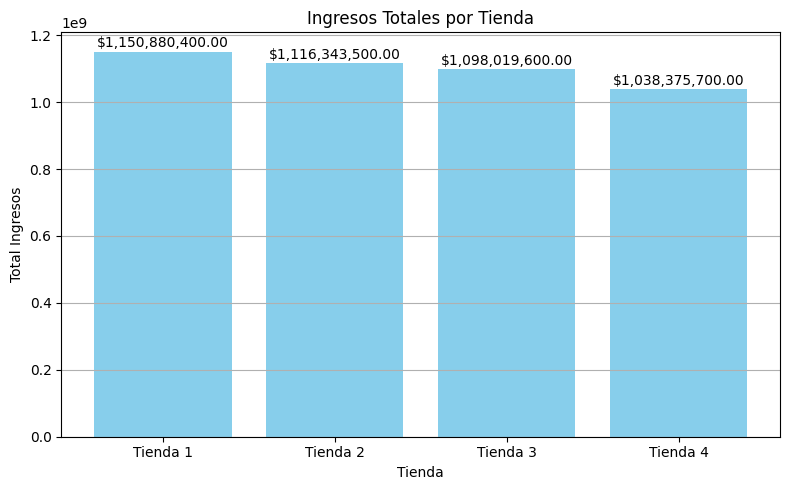

*   **Ventas por Categoría:**

    El análisis de ventas por categoría revela las categorías de productos más y menos vendidas en cada tienda. Si bien las categorías principales (Muebles, Electrónicos) se mantienen consistentes, la distribución y la cantidad de ventas por categoría varían entre tiendas.

*   **Calificación Promedio de Clientes:**

    Las calificaciones promedio de los clientes por tienda son:

    1. Tienda 1: 3.98
    2. Tienda 2: 4.04
    3. Tienda 3: 4.05
    4. Tienda 4: 4.00

    Las calificaciones son relativamente similares entre las tiendas, con la Tienda 3 teniendo la calificación promedio ligeramente más alta y la Tienda 1 la más baja.

*   **Productos Más y Menos Vendidos:**

    Los gráficos de barras ilustran los productos más y menos vendidos en cada tienda. Este análisis destaca la diversidad de la demanda de productos en cada ubicación y ayuda a identificar productos de bajo rendimiento.
    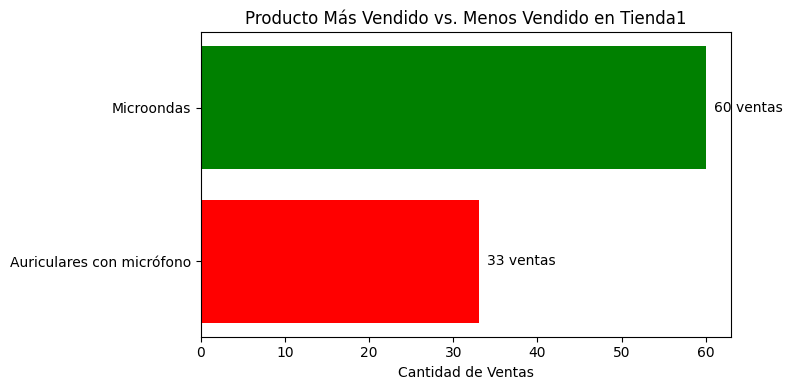

    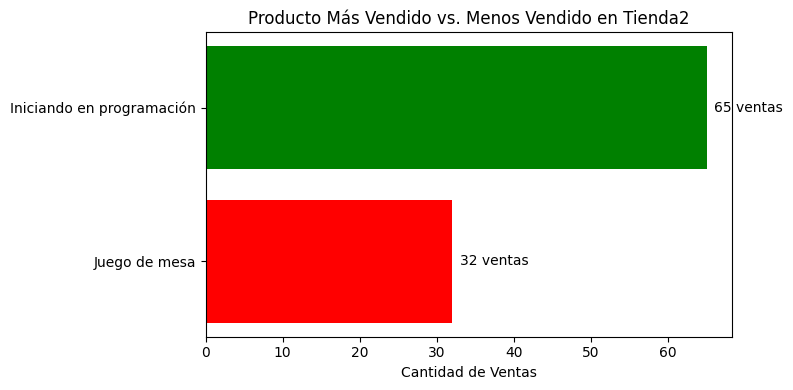

    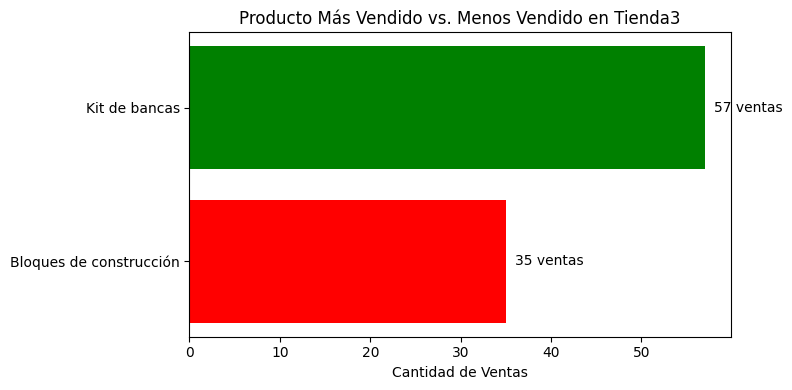

    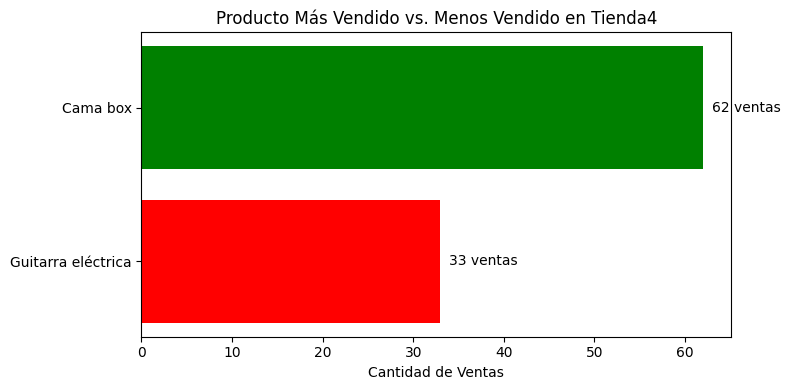

*   **Costo de Envío Promedio:**

    El costo de envío promedio para cada tienda es:

    1. Tienda 1 - Envío promedio: $26018.61
    2. Tienda 2 - Envío promedio: $25216.24
    3. Tienda 3 - Envío promedio: $24805.68
    4. Tienda 4 - Envío promedio: $23459.46

    La Tienda 1 tiene el costo de envío promedio más alto, mientras que la Tienda 4 tiene el costo de envío promedio más bajo. El gráfico de línea visualiza esta tendencia.
    
    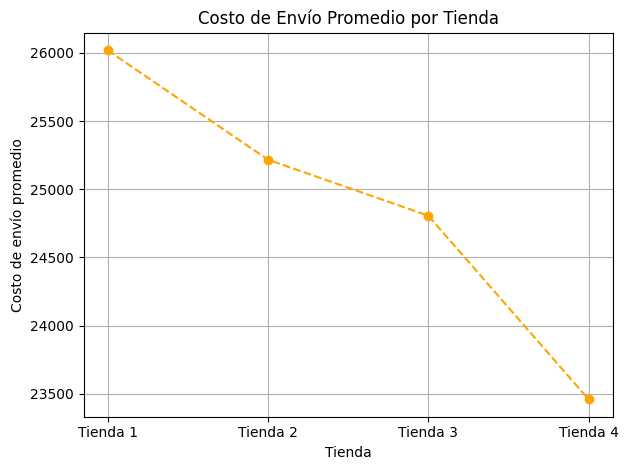

**Conclusión:**

Considerando todos los factores analizados, **se recomienda al Sr. Juan vender la Tienda 4.**

Esta recomendación se basa principalmente en los siguientes puntos:

1.  **Menores Ingresos Totales:** La Tienda 4 presenta los ingresos totales más bajos en comparación con las otras tiendas, lo que podría indicar un menor rendimiento financiero.
2.  **Costo de Envío Promedio Más Bajo:** Aunque un costo de envío más bajo podría ser positivo para los clientes, desde la perspectiva de la rentabilidad, un costo promedio significativamente menor podría reflejar una menor cantidad de envíos en general, lo que se alinea con los menores ingresos.
3.  **Calificación Promedio:** Si bien la calificación promedio de la Tienda 4 no es la más baja, se encuentra inferior en comparación con las tiendas 2 y 3.

Aunque la Tienda 1 tiene el costo de envío promedio más alto y la calificación promedio más baja, sus ingresos totales son los más altos, lo que sugiere un negocio rentable.

Por lo tanto, basándonos en los ingresos más bajos y el menor costo de envío promedio, la Tienda 4 parece ser la opción más lógica para vender si el objetivo es invertir en otro nuevo negocio.